## Data Exploration
### B. Thomas

In [8]:
# Import the dependencies.
from pathlib import Path
from sqlalchemy import create_engine
from pandasql import sqldf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Using default parameters for a local PostgreSQL instance

host = 'localhost'
port = '5432'
database = 'flight_data_analysis'
user = 'postgres'
password = 'sql1978'

# Create the database connection string
# Create Database Connection

connection_string = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)
conn = engine.connect()



In [4]:
df = pd.read_sql('SELECT * FROM flight_data', con=engine)
df.head()

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,1,12,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2,12,Endeavor Air Inc.,AEX,"Alexandria, LA",62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,3,12,Endeavor Air Inc.,AGS,"Augusta, GA",95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,4,12,Endeavor Air Inc.,ALB,"Albany, NY",23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,5,12,Endeavor Air Inc.,ATL,"Atlanta, GA",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [7]:
df.columns

Index(['flight_data_id', 'month', 'carrier_name', 'airport', 'city',
       'total_arrivals', 'total_delays_ct', 'carrier_ct', 'weather_ct',
       'nat_air_sys_ct', 'security_ct', 'late_aircraft_ct', 'flight_cancelled',
       'flight_diverted', 'total_delays_min', 'carrier_delay_min',
       'weather_delay_min', 'nat_air_sys_delay_min', 'security_delay_min',
       'late_aircraft_delay_min'],
      dtype='object')

## Explore patterns and correlations between total_delays_ct and total_delays_min overall and by carrier (averaged)

#### Create a scatter plot to show relationship between total frequency of delays (by # of flights) vs duration of delays

In [15]:
#determine x and y axes limits
df[['total_delays_ct', 'total_delays_min']].max()

total_delays_ct       4142.0
total_delays_min    438783.0
dtype: float64

In [29]:
frequency = df['total_delays_ct']
duration = df['total_delays_min']
ratio = df['total_delays_ct']/df['total_arrivals']

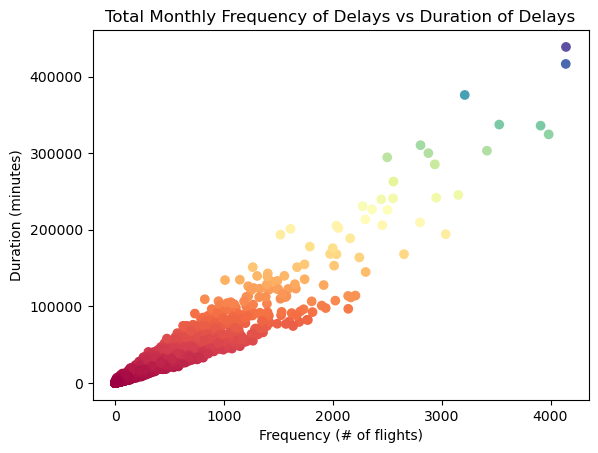

In [34]:
# Tell matplotlib to create a scatter plot using frequency vs duration where the color of each point is determined by their y value
plt.scatter(frequency, duration, marker="o", c=duration, cmap='Spectral')
plt.title("Total Frequency vs Duration of Delays (Monthly)")
plt.xlabel("Frequency (# of flights)")
plt.ylabel("Duration (minutes)")
plt.show()

In [31]:
rank_frequency = df.sort_values(['total_delays_ct'], ascending=False)
rank_frequency.head(10)

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,carrier_ct,weather_ct,nat_air_sys_ct,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
9494,9495,7,American Airlines Network,DFW,"Dallas/Fort Worth, TX",14701.0,4142.0,1131.83,211.23,715.04,14.84,2069.07,130.0,26.0,438783.0,162563.0,16369.0,31163.0,729.0,227959.0
11364,11365,6,American Airlines Network,DFW,"Dallas/Fort Worth, TX",14206.0,4140.0,981.87,266.42,989.32,7.97,1894.42,150.0,120.0,416577.0,118772.0,25206.0,48946.0,347.0,223306.0
11680,11681,6,Delta Air Lines Network,ATL,"Atlanta, GA",19213.0,3983.0,1205.19,160.84,850.29,4.74,1761.94,215.0,50.0,324572.0,140205.0,18299.0,46454.0,249.0,119365.0
9805,9806,7,Delta Air Lines Network,ATL,"Atlanta, GA",20084.0,3909.0,1293.91,197.20,772.69,1.88,1643.32,259.0,88.0,335957.0,152758.0,15569.0,48958.0,251.0,118421.0
16990,16991,3,American Airlines Network,DFW,"Dallas/Fort Worth, TX",13234.0,3529.0,820.47,149.77,999.84,8.27,1550.65,304.0,84.0,337375.0,118554.0,15718.0,47438.0,403.0,155262.0
7932,7933,8,Delta Air Lines Network,ATL,"Atlanta, GA",19716.0,3416.0,928.68,169.57,935.84,1.00,1380.91,475.0,125.0,303248.0,110115.0,22089.0,70200.0,43.0,100801.0
7627,7628,8,American Airlines Network,DFW,"Dallas/Fort Worth, TX",14953.0,3212.0,898.24,103.53,516.87,9.69,1683.67,151.0,45.0,376057.0,141614.0,7619.0,20738.0,537.0,205549.0
17295,17296,3,Delta Air Lines Network,ATL,"Atlanta, GA",18504.0,3153.0,805.86,108.33,848.24,1.56,1389.01,257.0,42.0,245487.0,94114.0,13518.0,43005.0,136.0,94714.0
10964,10965,7,Southwest Airlines,DEN,"Denver, CO",8673.0,3037.0,591.10,78.71,1068.20,5.65,1293.34,193.0,69.0,194272.0,34179.0,8128.0,68394.0,244.0,83327.0
21102,21103,1,Delta Air Lines Network,ATL,"Atlanta, GA",16943.0,2950.0,904.87,107.75,852.86,0.69,1083.83,95.0,54.0,241951.0,104179.0,17025.0,39061.0,35.0,81651.0


#### Create a scatter plot to show relationship between total frequency of delays (by % of total flights) vs duration of delays

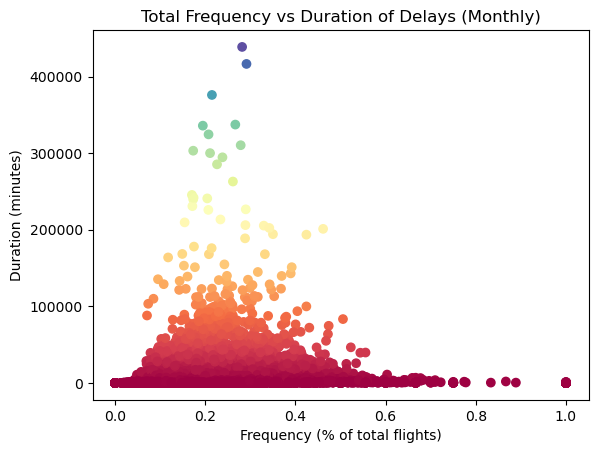

In [38]:
# Tell matplotlib to create a scatter plot using ratio vs duration where the color of each point is determined by their y value
plt.scatter(ratio, duration, marker="o", c=duration, cmap='Spectral')
plt.title("Total Frequency vs Duration of Delays (Monthly)")
plt.xlabel("Frequency (% of total flights)")
plt.ylabel("Duration (minutes)")
plt.show()

In [41]:
#add percent delayed column to include ratio of delays to total arrivals
df['percent_delayed'] = ratio

In [42]:
#reorder columns so percent delayed shows after total delays (ct)
df = df[['flight_data_id', 'month', 'carrier_name', 'airport', 'city',
       'total_arrivals', 'total_delays_ct', 'percent_delayed', 'carrier_ct', 'weather_ct',
       'nat_air_sys_ct', 'security_ct', 'late_aircraft_ct', 'flight_cancelled',
       'flight_diverted', 'total_delays_min', 'carrier_delay_min',
       'weather_delay_min', 'nat_air_sys_delay_min', 'security_delay_min',
       'late_aircraft_delay_min']]
df.head()

,flight_data_id,month,carrier_name,airport,city,total_arrivals,total_delays_ct,percent_delayed,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,flight_cancelled,flight_diverted,total_delays_min,carrier_delay_min,weather_delay_min,nat_air_sys_delay_min,security_delay_min,late_aircraft_delay_min
0,1,12,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",72.0,5.0,0.069444,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2,12,Endeavor Air Inc.,AEX,"Alexandria, LA",62.0,7.0,0.112903,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,3,12,Endeavor Air Inc.,AGS,"Augusta, GA",95.0,10.0,0.105263,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,4,12,Endeavor Air Inc.,ALB,"Albany, NY",23.0,2.0,0.086957,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,5,12,Endeavor Air Inc.,ATL,"Atlanta, GA",2111.0,256.0,0.121270,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


#### Create a scatter plot to show relationship between total frequency of delays (by % of total flights) vs duration of delays by airline

In [44]:
#extract columns of data from SQL flight_data table to perform same analysis above but grouped by airline 
query_airlines = """
SELECT carrier_name, SUM(total_arrivals) AS total_arrivals, SUM(total_delays_ct) AS total_delays_ct, SUM(total_delays_min) AS total_delays_min
FROM flight_data
GROUP BY carrier_name
ORDER BY total_arrivals DESC;
"""
df_byairline = pd.read_sql(query_airlines, engine)
df_byairline

,carrier_name,total_arrivals,total_delays_ct,total_delays_min
0,Southwest Airlines,1438465.0,309963.0,15401971.0
1,Delta Air Lines Network,984986.0,159257.0,11376572.0
2,American Airlines Network,940531.0,213850.0,18295407.0
3,United Air Lines Network,732212.0,148386.0,10540416.0
4,SkyWest Airlines Inc.,675285.0,108189.0,8421804.0
5,Republic Airline,295651.0,37587.0,2485746.0
6,JetBlue Airways,274852.0,83550.0,7072583.0
7,Spirit Airlines,263871.0,75428.0,5400279.0
8,Alaska Airlines Network,245344.0,47648.0,2378066.0
9,Envoy Air,227505.0,40831.0,2395057.0


In [46]:
airfrequency = df_byairline['total_delays_ct']
airduration = df_byairline['total_delays_min']
airratio = df_byairline['total_delays_ct']/df_byairline['total_arrivals']
airavemin = df_byairline['total_delays_min']/df_byairline['total_delays_ct']

df_byairline['percent_delayed'] = airratio
df_byairline['average_delay'] = airavemin
df_byairline

,carrier_name,total_arrivals,total_delays_ct,total_delays_min,percent_delayed,average_delay
0,Southwest Airlines,1438465.0,309963.0,15401971.0,0.215482,49.689708
1,Delta Air Lines Network,984986.0,159257.0,11376572.0,0.161685,71.435303
2,American Airlines Network,940531.0,213850.0,18295407.0,0.227372,85.552523
3,United Air Lines Network,732212.0,148386.0,10540416.0,0.202654,71.033763
4,SkyWest Airlines Inc.,675285.0,108189.0,8421804.0,0.160212,77.843441
5,Republic Airline,295651.0,37587.0,2485746.0,0.127133,66.133131
6,JetBlue Airways,274852.0,83550.0,7072583.0,0.303982,84.650904
7,Spirit Airlines,263871.0,75428.0,5400279.0,0.285852,71.595150
8,Alaska Airlines Network,245344.0,47648.0,2378066.0,0.194209,49.909041
9,Envoy Air,227505.0,40831.0,2395057.0,0.179473,58.657809


In [47]:
rank_percent = df_byairline.sort_values(['percent_delayed'], ascending=False)
rank_percent

,carrier_name,total_arrivals,total_delays_ct,total_delays_min,percent_delayed,average_delay
12,Frontier Airlines,177542.0,54525.0,4252311.0,0.307110,77.988281
6,JetBlue Airways,274852.0,83550.0,7072583.0,0.303982,84.650904
7,Spirit Airlines,263871.0,75428.0,5400279.0,0.285852,71.595150
13,Allegiant Air,115539.0,29653.0,2382440.0,0.256649,80.343979
16,Hawaiian Airlines Network,80967.0,18958.0,905646.0,0.234145,47.771178
15,Mesa Airlines Inc.,88678.0,20690.0,2004563.0,0.233316,96.885597
19,Air Wisconsin Airlines Corp,58078.0,13367.0,1221136.0,0.230156,91.354530
2,American Airlines Network,940531.0,213850.0,18295407.0,0.227372,85.552523
0,Southwest Airlines,1438465.0,309963.0,15401971.0,0.215482,49.689708
3,United Air Lines Network,732212.0,148386.0,10540416.0,0.202654,71.033763


In [49]:
rank_time = df_byairline.sort_values(['average_delay'], ascending=False) 
rank_time

,carrier_name,total_arrivals,total_delays_ct,total_delays_min,percent_delayed,average_delay
15,Mesa Airlines Inc.,88678.0,20690.0,2004563.0,0.233316,96.885597
19,Air Wisconsin Airlines Corp,58078.0,13367.0,1221136.0,0.230156,91.354530
2,American Airlines Network,940531.0,213850.0,18295407.0,0.227372,85.552523
6,JetBlue Airways,274852.0,83550.0,7072583.0,0.303982,84.650904
17,CommuteAir LLC dba CommuteAir,70808.0,12067.0,994944.0,0.170419,82.451645
13,Allegiant Air,115539.0,29653.0,2382440.0,0.256649,80.343979
12,Frontier Airlines,177542.0,54525.0,4252311.0,0.307110,77.988281
4,SkyWest Airlines Inc.,675285.0,108189.0,8421804.0,0.160212,77.843441
14,Piedmont Airlines,99047.0,13687.0,1055754.0,0.138187,77.135530
10,Endeavor Air Inc.,201517.0,27408.0,2081666.0,0.136008,75.951036


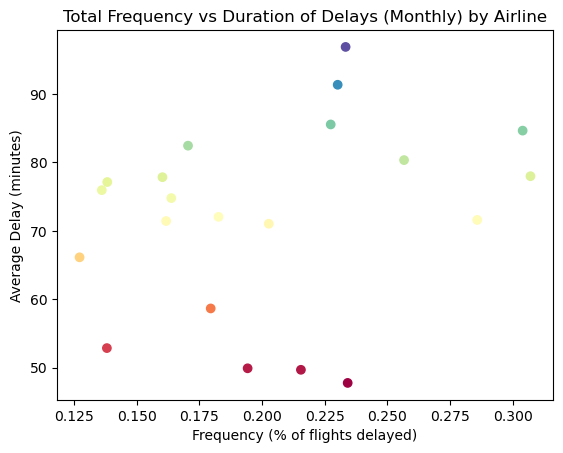

In [58]:
# Tell matplotlib to create a scatter plot using frequency vs duration where the color of each point is determined by their y value

plt.scatter(airratio, airavemin, marker="o", c=airavemin, cmap='Spectral')
plt.title("Total Frequency vs Duration of Delays (Monthly) by Airline")
plt.xlabel("Frequency (% of flights delayed)")
plt.ylabel("Average Delay (minutes)")
plt.show()

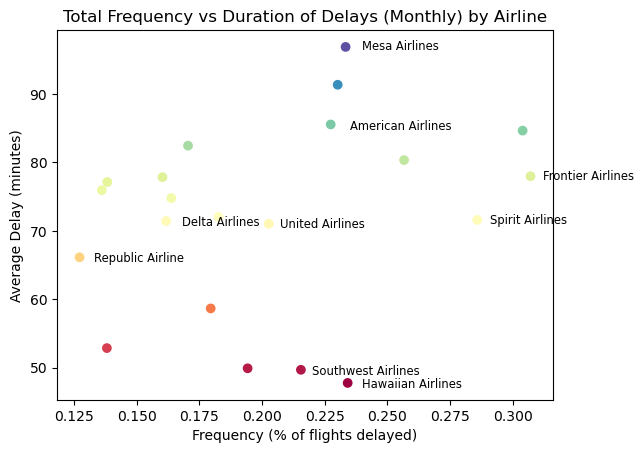

In [101]:
#annoate key data points
plt.scatter(airratio, airavemin, marker="o", c=airavemin, cmap='Spectral')
plt.title("Total Frequency vs Duration of Delays (Monthly) by Airline")
plt.xlabel("Frequency (% of flights delayed)")
plt.ylabel("Average Delay (minutes)")

plt.text(0.225 + 0.015, 47, "Hawaiian Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.225 + 0.015, 96.5, "Mesa Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.125 + 0.008, 65.5, "Republic Airline", horizontalalignment='left', size='small', color='black')
plt.text(0.300 + 0.012, 77.5, "Frontier Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.150 + 0.018, 70.7, "Delta Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.200 + 0.02, 49, "Southwest Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.200 + 0.035, 84.8, "American Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.275 + 0.016, 71, "Spirit Airlines", horizontalalignment='left', size='small', color='black')
plt.text(0.200 + 0.007, 70.5, "United Airlines", horizontalalignment='left', size='small', color='black')
plt.show()

### Summary
#### The first scatter plot shows a positive correlation between the frequency of delays and total minutes delayed for a given airline, airport and month. This is expected as more flights contribute to a higher total in minutes delayed. 
#### The second scatter plot demonstrated the distribution of data points as the relationship between % of total flights delayed and total minutes delayed for a given airline, airport and month. One hypothesis that could be tested is whether airlines with more frequent delays also have shorter delays whereas airlines with fewer delays may experience longer delays. While % of flights delayed takes into account helps neutralize caused by a low n (low # of total flights taken), the distribution appears random.
#### The third scatter plot graphed the frequency of flights delayed (by % of total flights) vs average delay in minutes per flight for each specific airline. No real correlation is apparent; however travelers can choose whether they may wish to choose airlines that have a lower risk of delay and but moderate to high average time / delay (Republic Airline, Delta Airlines) vs higher risk of delay but less than an hour of total time delayed (Hawaiian Airlines). They may avoid those with both high frequency of delay and higher durations of delay (Frontier Airlines). 